# Question 1: Are there certain areas or states where it is more likely to have a customer churn?

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [41]:
test_df = pd.read_csv('/Users/mahmoud/Documents/Project_3/test.csv')

test_df.shape

(334, 22)

In [42]:
train_df = pd.read_csv('/Users/mahmoud/Documents/Project_3/train.csv')

train_df.shape

(2999, 22)

In [43]:
test_df = test_df.drop(columns=['Unnamed: 0'])
train_df = train_df.drop(columns=['Unnamed: 0'])

In [44]:
test_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,IN,68,415,386-9724,no,no,0,222.1,107,37.76,...,102,16.95,162.4,107,7.31,9.4,3,2.54,2,False
1,MI,102,510,336-4656,no,no,0,102.6,89,17.44,...,77,20.91,170.5,140,7.67,9.1,4,2.46,2,False
2,AZ,72,510,407-9830,no,no,0,272.4,88,46.31,...,125,9.17,185.5,81,8.35,12.7,2,3.43,0,False
3,TN,108,408,352-1127,no,yes,15,165.1,85,28.07,...,93,22.70,250.7,114,11.28,10.9,4,2.94,1,False
4,OK,52,408,389-4780,no,no,0,214.7,68,36.50,...,138,13.48,123.4,114,5.55,9.4,4,2.54,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,FL,84,510,341-3180,no,no,0,191.0,88,32.47,...,119,27.10,247.3,79,11.13,6.5,4,1.76,0,False
330,WI,93,415,392-6286,no,no,0,152.1,141,25.86,...,107,18.32,262.4,111,11.81,12.0,7,3.24,1,False
331,MI,61,415,349-5617,no,yes,33,270.7,53,46.02,...,116,17.06,201.7,102,9.08,10.9,3,2.94,3,False
332,CA,37,415,345-1243,no,no,0,191.1,69,32.49,...,113,10.98,207.5,117,9.34,12.9,1,3.48,0,False


In [45]:
train_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,DC,55,510,354-5058,yes,no,0,106.1,77,18.04,...,100,10.50,96.4,92,4.34,12.9,3,3.48,0,False
1,IL,71,510,330-7137,yes,no,0,186.1,114,31.64,...,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
2,UT,112,415,358-5953,no,no,0,115.8,108,19.69,...,111,20.68,184.6,78,8.31,13.1,5,3.54,1,False
3,NY,77,415,388-9285,no,yes,33,143.0,101,24.31,...,102,18.04,104.9,120,4.72,15.3,4,4.13,5,True
4,NV,69,510,397-6789,yes,yes,33,271.5,98,46.16,...,102,21.54,165.4,85,7.44,8.2,2,2.21,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,NC,116,408,338-7527,no,yes,19,155.7,104,26.47,...,118,15.76,192.7,116,8.67,8.2,2,2.21,3,False
2995,WV,161,415,418-9036,no,no,0,191.9,113,32.62,...,87,6.03,204.8,107,9.22,13.4,4,3.62,4,True
2996,RI,93,415,406-5584,no,no,0,98.4,78,16.73,...,129,21.22,248.2,114,11.17,14.2,4,3.83,1,False
2997,MN,139,510,374-9107,no,no,0,134.4,106,22.85,...,98,17.96,193.6,125,8.71,10.2,2,2.75,5,True


In [46]:
# Fiding Unique states 
display(train_df['state'].unique())
display(train_df['area code'].unique())

array(['DC', 'IL', 'UT', 'NY', 'NV', 'KY', 'WY', 'MT', 'NE', 'CT', 'MO',
       'SC', 'DE', 'CO', 'IN', 'NM', 'TX', 'FL', 'ND', 'AL', 'OK', 'NC',
       'MA', 'VA', 'VT', 'MD', 'KS', 'MN', 'WA', 'AZ', 'IA', 'AK', 'MI',
       'OR', 'WV', 'GA', 'MS', 'OH', 'ID', 'WI', 'SD', 'HI', 'LA', 'ME',
       'RI', 'NJ', 'AR', 'NH', 'CA', 'TN', 'PA'], dtype=object)

array([510, 415, 408])

In [66]:
churn_by_state = train_df.groupby('state')['churn'].value_counts(normalize=True)
churn_by_state = pd.DataFrame(churn_by_state)
churn_by_state.columns = ['value'] 
# value is showing how likely it is for that state overall to churn
churn_by_state = churn_by_state.reset_index()

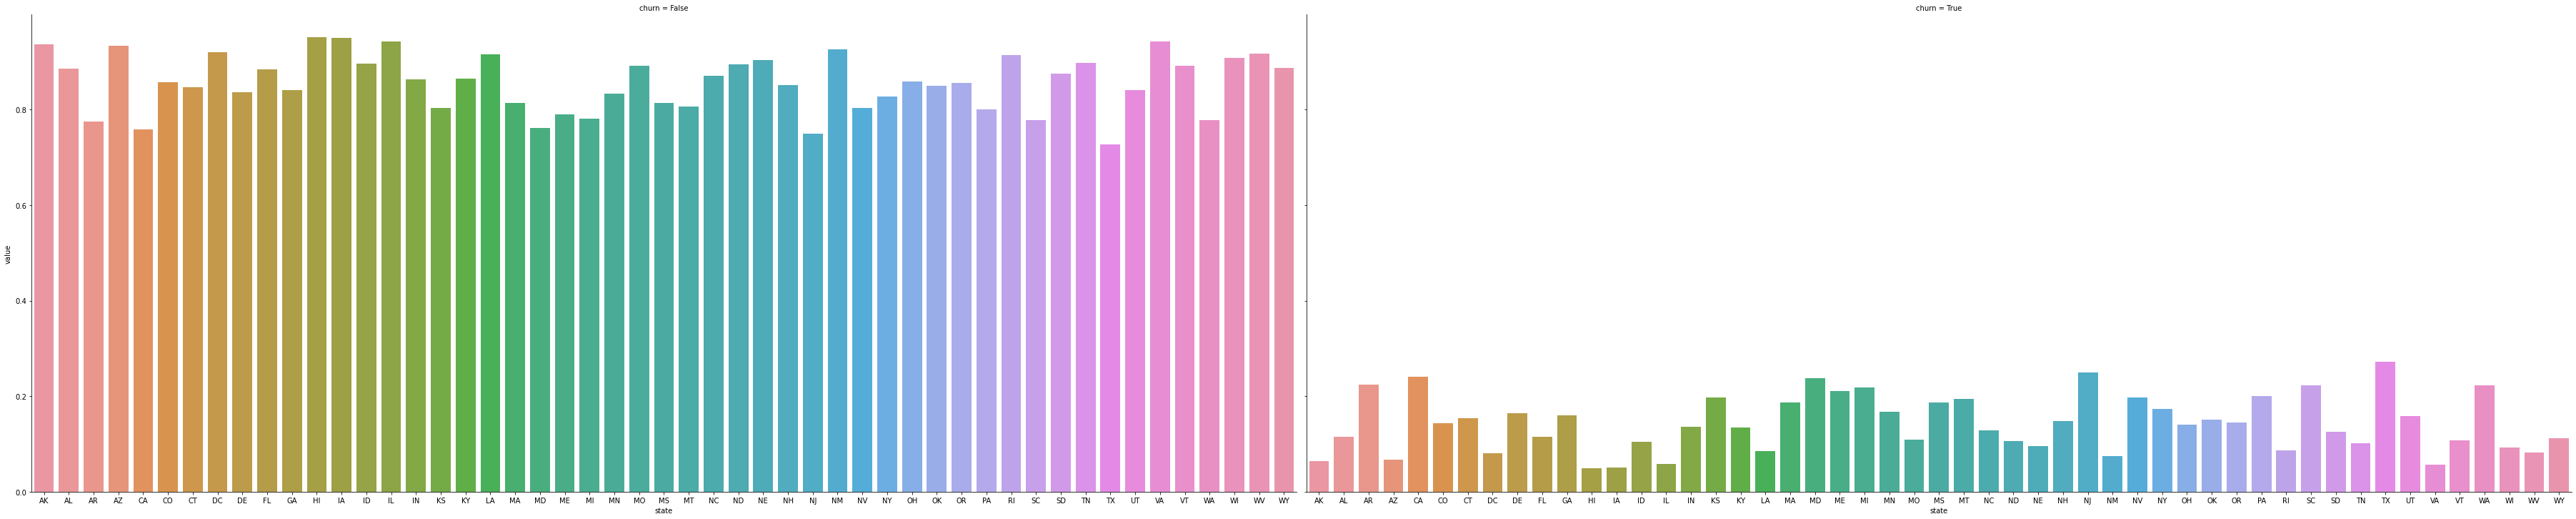

In [50]:
sns.catplot(
    data=churn_by_state, x="state", y="value", col="churn",
    kind="bar", height=10, aspect=2.5,
)

In [84]:
top5 = churn_by_state.sort_values('value',ascending=True).head(10)

In [85]:
top5

,state,churn,value
23,HI,True,0.048780
25,IA,True,0.050000
91,VA,True,0.057143
29,IL,True,0.057692
1,AK,True,0.063830
7,AZ,True,0.066667
65,NM,True,0.074074
15,DC,True,0.080000
99,WV,True,0.082474
37,LA,True,0.085106


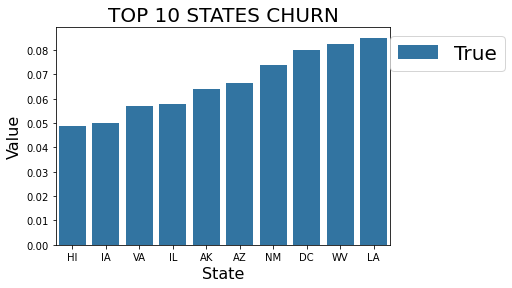

In [93]:
sns.barplot(
    data=top5, x="state", y="value", hue="churn", 
#     kind="bar", height=10, aspect=1.5,
)

plt.title('TOP 10 STATES CHURN', fontsize=20)
plt.ylabel('Value', fontsize=16)
plt.xlabel('State', fontsize=16)
plt.legend(loc=(1, .8), fontsize=20);

In [17]:
churn_by_state = pd.crosstab(train_df['state'], train_df['churn'])
churn_by_state

churn,False,True
state,,
AK,44,3
AL,62,8
AR,38,11
AZ,56,4
CA,22,7
CO,54,9
CT,55,10
DC,46,4
DE,46,9


In [94]:
churn_by_charge = pd.crosstab(train_df['total day charge'], train_df['churn'])
churn_by_charge

churn,False,True
total day charge,,
0.00,1,1
0.44,1,0
1.33,1,0
2.13,1,0
2.99,1,0
...,...,...
56.83,0,1
57.36,0,1
58.70,0,1


In [98]:
churn_by_charge.sort_values('total day charge',ascending=True).head(10)

churn,False,True
total day charge,,
0.00,1,1
0.44,1,0
1.33,1,0
2.13,1,0
2.99,1,0
3.21,1,0
3.32,1,0
4.40,1,0
4.59,1,0


Text(0.5, 0, 'churn')

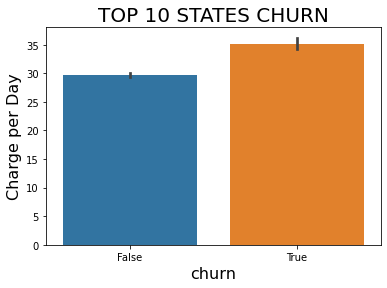

In [126]:
sns.barplot(
    data=train_df, x="churn", y="total day charge",
#     kind="bar", height=10, aspect=1.5,
)

plt.title('TOP 10 STATES CHURN', fontsize=20)
plt.ylabel('Charge per Day', fontsize=16)
plt.xlabel('churn', fontsize=16)
# plt.legend(loc=(1, .8), fontsize=20);

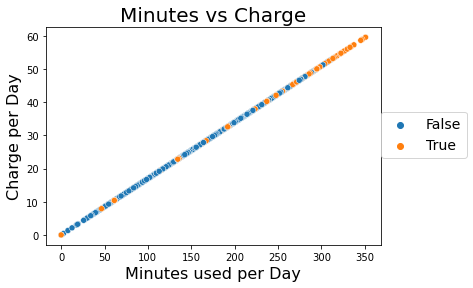

In [123]:
sns.scatterplot(
    data=train_df, x="total day minutes", y="total day charge", hue='churn'
#     kind="bar", height=10, aspect=1.5,
)

plt.title('Minutes vs Charge', fontsize=20)
plt.ylabel('Charge per Day', fontsize=16)
plt.xlabel('Minutes used per Day', fontsize=16)
plt.legend(loc=(1, .4), fontsize=14);

# states with greatest churn (meaning 10+ churns)
WA, UT, TX, SC, OR, OH, NY, NV, NJ, MT, MS, MN, MI, ME, MD, MA, KS, CT, AR

# State + Area code Churn Rate

In [89]:
train_df['area code'].unique()

array([510, 415, 408])

In [18]:
churn_by_state = pd.crosstab(train_df['state'], train_df['area code'])
churn_by_state

area code,408,415,510
state,,,
AK,14,21,12
AL,23,33,14
AR,13,24,12
AZ,15,33,12
CA,7,14,8
CO,24,28,11
CT,19,34,12
DC,12,25,13
DE,12,26,17


# States that churn
CA, CT, DC, FL, HI, IA, ID, IL, KY, MD, ME, MI, MN, MO, MS, MT, NC, NH, NJ, NM, NV, NY, OK, OR, RI, SC, SD, VA, VT, WI, WV, WY

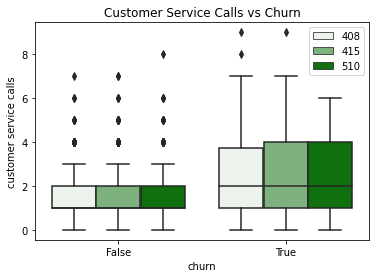

In [32]:
sns.boxplot(data = train_df,x = 'churn',y = 'customer service calls',color = 'green',
            hue='area code').set(title='Customer Service Calls vs Churn')
plt.legend(loc='upper right')

# Area 415  had the greatest churn when customer service was called

In [25]:
data = pd.get_dummies(train_df, columns=['area code'])
data

,state,account length,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area code_408,area code_415,area code_510
0,DC,55,354-5058,yes,no,0,106.1,77,18.04,123.5,...,92,4.34,12.9,3,3.48,0,False,0,0,1
1,IL,71,330-7137,yes,no,0,186.1,114,31.64,198.6,...,80,9.29,13.8,5,3.73,4,True,0,0,1
2,UT,112,358-5953,no,no,0,115.8,108,19.69,243.3,...,78,8.31,13.1,5,3.54,1,False,0,1,0
3,NY,77,388-9285,no,yes,33,143.0,101,24.31,212.2,...,120,4.72,15.3,4,4.13,5,True,0,1,0
4,NV,69,397-6789,yes,yes,33,271.5,98,46.16,253.4,...,85,7.44,8.2,2,2.21,1,True,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,NC,116,338-7527,no,yes,19,155.7,104,26.47,185.4,...,116,8.67,8.2,2,2.21,3,False,1,0,0
2995,WV,161,418-9036,no,no,0,191.9,113,32.62,70.9,...,107,9.22,13.4,4,3.62,4,True,0,1,0
2996,RI,93,406-5584,no,no,0,98.4,78,16.73,249.6,...,114,11.17,14.2,4,3.83,1,False,0,1,0
2997,MN,139,374-9107,no,no,0,134.4,106,22.85,211.3,...,125,8.71,10.2,2,2.75,5,True,0,0,1


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2999 non-null   object 
 1   account length          2999 non-null   int64  
 2   phone number            2999 non-null   object 
 3   international plan      2999 non-null   object 
 4   voice mail plan         2999 non-null   object 
 5   number vmail messages   2999 non-null   int64  
 6   total day minutes       2999 non-null   float64
 7   total day calls         2999 non-null   int64  
 8   total day charge        2999 non-null   float64
 9   total eve minutes       2999 non-null   float64
 10  total eve calls         2999 non-null   int64  
 11  total eve charge        2999 non-null   float64
 12  total night minutes     2999 non-null   float64
 13  total night calls       2999 non-null   int64  
 14  total night charge      2999 non-null   

/Users/mahmoud/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


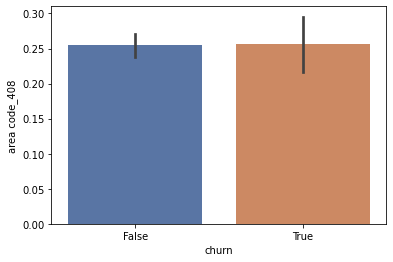

In [34]:
fig = sns.barplot(data['churn'], data['area code_408'], palette="deep")

/Users/mahmoud/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


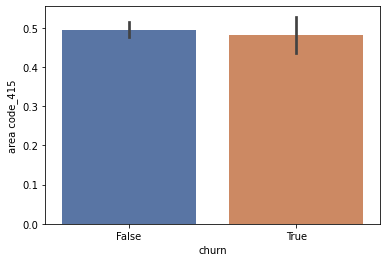

In [35]:
fig = sns.barplot(data['churn'], data['area code_415'], palette="deep")

/Users/mahmoud/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


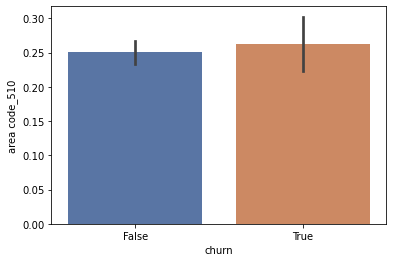

In [36]:
fig = sns.barplot(data['churn'], data['area code_510'], palette="deep")

# How many people are in those states that churn, is there a ratio?

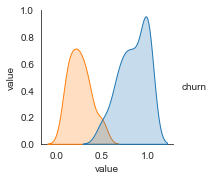

In [64]:
sns.pairplot(churn_by_state, hue="churn")